<h1> Reproducing Figures 1 and 3 Without the Error Bars </h1>

This notebook is indended as a quickstart guide to the code contained in this repository. Figures 1 and 3 are reproduced without the error bars, i.e., the below results are plotted over 1 run only. The code contained in src/experiments/mirror_descent_complexity_experiment.py essentially replaces the "prototype_run" function calls with "full_run", that allows for spanning multiple processes to speed up the simulations. The "full_run" function is not recommended to be executed from within this notebook, since Python's multiprocessing library is not fully compatible with the Jupyter Notebook. The code reproducing the simulation plotted in Figure 2 (in the paper) appears in src/experiments/range_of_early_stopped_estimator_experiment.py.

In [1]:
import sys
sys.path.append('..')
sys.path.append('../rprml')

import copy
import numpy as np
import torch
from matplotlib import pyplot as plt

from src.experiments.mirror_descent_complexity_experiment import \
    get_l2_experiment, get_hypentropy_experiment, get_lasso_experiment, get_ridge_experiment

plt.rcParams['figure.figsize'] = [9, 6]

# The joblib warning appears due to the import of the glmnet package (in src/elastic_net_simulations.py).
# This warning should be fixed in the subsequent release of the glmnet package.

/home/tomasv/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/tomasv/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
device=torch.device('cpu')

In [3]:
l2_experiment = get_l2_experiment()
hypentropy_experiment = get_hypentropy_experiment()
ridge_experiment = get_ridge_experiment()
lasso_experiment = get_lasso_experiment()

In [4]:
l2_results = l2_experiment.prototype_run(seed=0, device=device, epochs_per_simulation=300)
hypentropy_results = hypentropy_experiment.prototype_run(seed=0, device=device, epochs_per_simulation=300)
# The epochs_per_simulation parameter is ignored for ridge and lasso simulations.
ridge_results = ridge_experiment.prototype_run(seed=0, device=device, epochs_per_simulation=300)
lasso_results = lasso_experiment.prototype_run(seed=0, device=device, epochs_per_simulation=300)

Starting simulation Simulation with seed 0 for 300 epochs.








Starting simulation Simulation with seed 0 for 300 epochs.








Starting ElasticNet simulation.
Starting ElasticNet simulation.


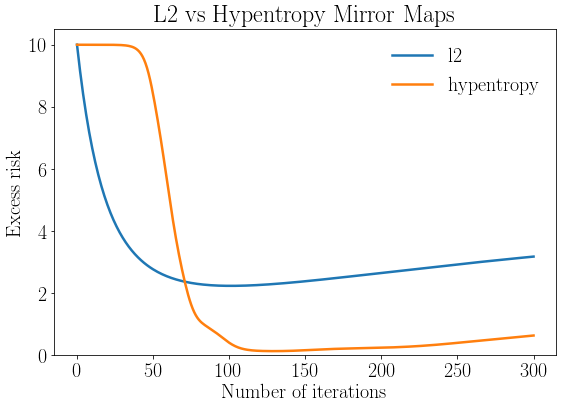

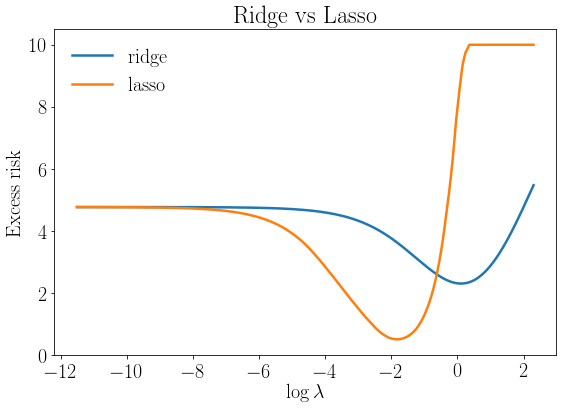

In [5]:
# Prototype of Figure 1 (see src/experiments/mirror_descent_complexity_experiment.py
# for reproducing the figure with the error bars).

plt.plot(l2_results[0]['excess_risk'])
plt.plot(hypentropy_results[0]['excess_risk'])
plt.xlabel("Number of iterations")
plt.ylabel("Excess risk")
plt.title("L2 vs Hypentropy Mirror Maps")
plt.legend(['l2', 'hypentropy'])
plt.ylim(0, 10.5)
plt.show()

xaxis = np.log(ridge_results[0]['xaxis']) # Set x-axis to log regularization parameter.
plt.plot(xaxis, ridge_results[0]['excess_risk'])
plt.plot(xaxis, lasso_results[0]['excess_risk'])
plt.xlabel(r"$\log \lambda$")
plt.ylabel("Excess risk")
plt.title("Ridge vs Lasso")
plt.legend(['ridge', 'lasso'])
plt.ylim(0, 10.5)
plt.show()

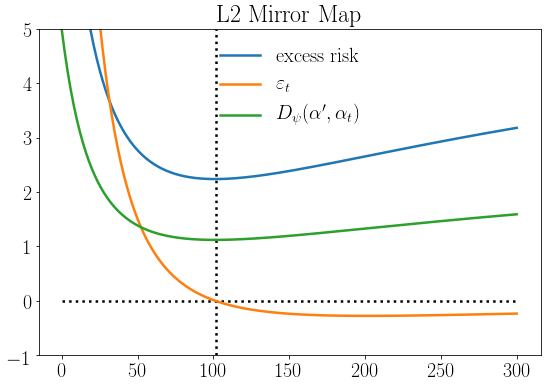

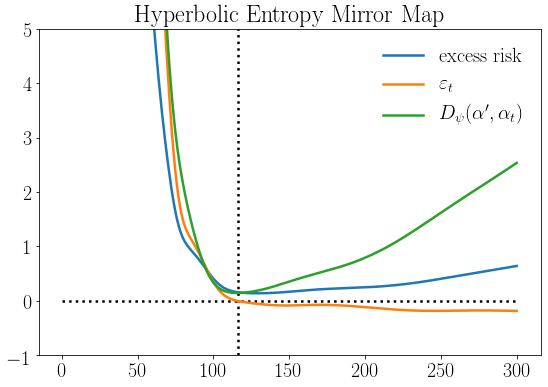

In [6]:
# Prototype of Figure 3 (see src/experiments/mirror_descent_complexity_experiment.py
# for reproducing the figure with the error bars).

simulation_results = [l2_results[0], hypentropy_results[0]]
simulation_name = ['L2 Mirror Map', 'Hyperbolic Entropy Mirror Map']
for i in range(len(simulation_results)):
    results = simulation_results[i]
    plt.plot(results['excess_risk'])
    plt.plot(results['eps'])
    plt.plot(results['breg'])
    plt.hlines(y=0.0, xmin=0, xmax=len(results['excess_risk']), linestyle='dotted')
    x_eps_0 = np.argmin(results['eps'] > 0.0)
    plt.vlines(x=x_eps_0, ymin=-1.0, ymax=5.0, linestyles='dotted')
    plt.legend(['excess risk', r'$\varepsilon_{t}$', r'$D_{\psi}(\alpha^\prime, \alpha_{t})$'])
    plt.ylim(-1.0, 5.0)
    plt.title(simulation_name[i])
    plt.show()